In [1]:
using DifferentialEquations;
using Plots;

In [2]:
########## THE RATIONALE ##########

# We have a function:
# -a*x^3+b*x^2+c*x+d
# This is the derivative wrt x of the potential function
# We will use this function to simulate data in the "shape" of the potential function

# To get the potential of the function we need to compute the anti-derivative of the function
# This is:
# -(a*x^4)/4 + (b*x^3)/3 + (c*x^2)/2 + d*x
# And then we multiply through by a negative due to the equation: potential = -log(steady state prob dist)
# (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x

In [3]:
########## THE POTENTIAL FUNCTION/LANDSCAPE ##########

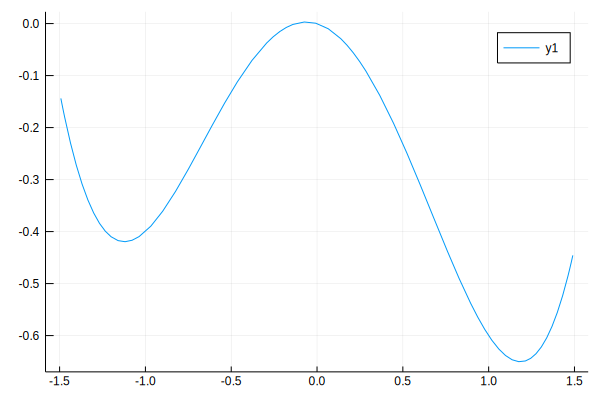

In [7]:
# We can plot the potential function in order to visualise the stable and unstable stationary points
# The shape of this potential function can be equated to the epigenetic landscapes

# We can see that the minima are: x -> 1.18477 and x -> -1.12208
# maxima: x -> -0.0626847
# Therefore, if we start with the number > -0.0626847 then we will be driven to 1.18477 and if we start with a number
# < -0.0626847 then we will be driven to -1.12208

a=1.2
b=0.0
c=1.6
d=0.1

g(x) = (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x

plot(g, -1.5, 1.5)

# NOTE: If we don't see enough data at the unstable stationary point then we can alter the parameters so that the
# gradient around the "peak" is smoother and therefore the "cells" will be in that position for a longer time

In [5]:
########## THE FUNCTION ##########

In [6]:
# Function to declare SDE
# Input: initial conditions; saveat; noise
# Return: SDE solution

##### How do we only save every 10 points??? saveat== ? But we still want to generate the data using a small dt

function sde(x₀, α)
    a=1.2
    b=0.0
    c=1.6
    d=0.1
    f(x,p,t) = -a*x^3+b*x^2+c*x+d
    g(x,p,t) = α*x
    tspan = (0.0,10.0) 
    prob = SDEProblem(f,g,x₀,tspan)
    saveat = 0.1
    sol = solve(prob,alg_hints=[:stiff],saveat=saveat)
    return sol
end

sde (generic function with 1 method)

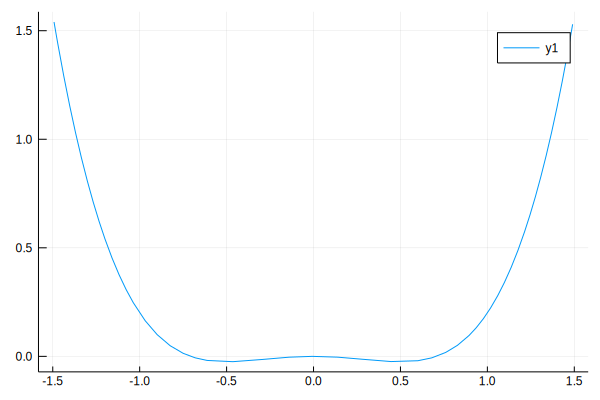

In [16]:
# If we change certain parameters in the function, can we change the shape of our potential function to have
# shallower wells at the stable stationary points?

a=1.6
b=0.0
c=0.4
d=0.0

g(x) = (a*x^4)/4 - (b*x^3)/3 - (c*x^2)/2 - d*x

plot(g, -1.5, 1.5)

# NOTE: If we don't see enough data at the unstable stationary point then we can alter the parameters so that the
# gradient around the "peak" is smoother and therefore the "cells" will be in that position for a longer time